## Importing Libaries and DataFrame

In [1]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# Train-Test Split
from sklearn.model_selection import train_test_split
# Accuracy Score
from sklearn.metrics import accuracy_score
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
songs = pd.read_csv("songs_normalize.csv")
songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [2]:
# Data Frame contains the top 2000 songs on spotify from 2000 to 2019. It contains their duration, explicitness, and genre.
# It also provides some measured variables like dancability, energy, acousticness, and liveness which can be used to examine
# the relationship between the variables themselves but can also be used to predict what genre each song falls into.

## Dropping Duplicate Songs

In [3]:
songs = songs.drop_duplicates()
print(songs)

              artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode

## Converting Duration in (ms) to Seconds

In [4]:
songs.loc[:,("duration_m")] = songs["duration_ms"]/1000/60
print(songs)
#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

              artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceability  energy  key  loudness  mode

C:\Users\steph\AppData\Local\Temp\ipykernel_14772\1663948562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs.loc[:,("duration_m")] = songs["duration_ms"]/1000/60


## Basic Statistics of Numeric Data

In [5]:
songs = songs.drop("duration_ms", axis = 1)

In [6]:
songs.describe()

,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_m
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442,3.809916
std,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475,0.654163
min,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000,1.883333
25%,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000,3.391767
50%,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000,3.719767
75%,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000,4.132433
max,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000,8.069100


In [7]:
songs.nunique()

artist               835
song                1879
explicit               2
year                  23
popularity            76
danceability         565
energy               580
key                   12
loudness            1671
mode                   2
speechiness          837
acousticness        1208
instrumentalness     772
liveness             783
valence              760
tempo               1831
genre                 59
duration_m          1793
dtype: int64

In [8]:
# Categorical data in this data set contains the artist, the song title, if it's explicit and the genre(s) it falls under.
# From this you can tell who sings the song, the name of it, if it contains explicit content, and what genre it is.

## Relationships between Numeric Data

In [9]:
linear_model = scipy.stats.linregress(songs["valence"], songs["danceability"])
v = songs["valence"]
slope = linear_model.slope
y_intercept = linear_model.intercept
linear_fit = slope*v+y_intercept
corr = scipy.stats.pearsonr(songs["valence"], songs["danceability"])
print("Correlation Coefficent:", corr[0])

Correlation Coefficent: 0.4037868012785066


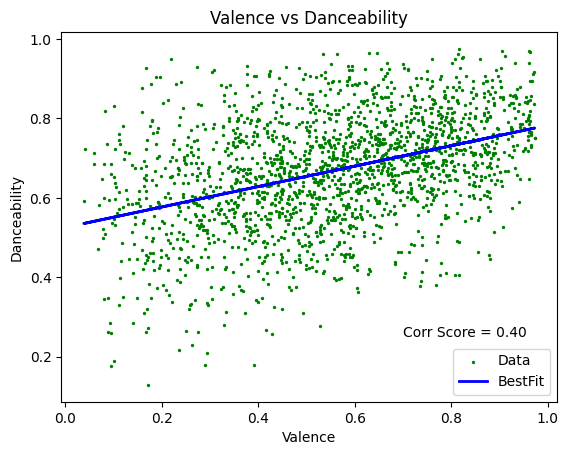

In [10]:
plt.figure()
plt.scatter(songs["valence"], songs["danceability"], s = 2, c = "green", label = "Data")
plt.plot(v, linear_fit, linewidth=2, c="b", label="BestFit")
plt.legend(fontsize=10, loc="lower right")
plt.xlabel("Valence")
plt.annotate("Corr Score = 0.40", (0.7, 0.25))
plt.ylabel("Danceability")
plt.title("Valence vs Danceability")
plt.show()

In [11]:
linear_model = scipy.stats.linregress(songs["liveness"], songs["loudness"])
l = songs["liveness"]
slope = linear_model.slope
y_intercept = linear_model.intercept
linear_fit = slope*l+y_intercept
corr = scipy.stats.pearsonr(songs["liveness"], songs["loudness"])
print("Correlation Coefficent:", corr[0])

Correlation Coefficent: 0.10197224684759643


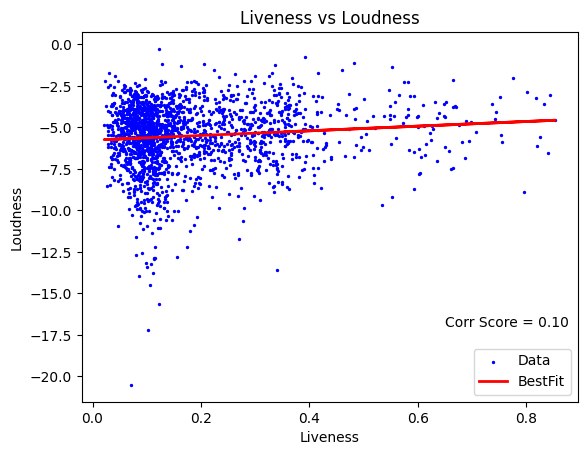

In [14]:
plt.figure()
plt.scatter(songs["liveness"], songs["loudness"], s = 2, c = "blue", label = "Data")
plt.plot(l, linear_fit, linewidth=2, c="r", label="BestFit")
plt.legend(fontsize=10, loc="lower right")
plt.annotate("Corr Score = 0.10", (0.65, -17.0))
plt.title("Liveness vs Loudness")
plt.xlabel("Liveness")
plt.ylabel("Loudness")
plt.show()

In [15]:
# When comparing the Loudness to a song and Liveness you could look for possible differences in the loudness of a track, that 
# being if it was performed live or not, which would show the differences in sound level in booth recordings and live recordings.
# Liveness being measured from 0 to 1 with anything abouve 0.8 being recorded live. There is no correlation or real impact on a songs
# loudness based on if the song was performed live as almost all songs measured have a loudness concentrated between -2.5 and -8.5

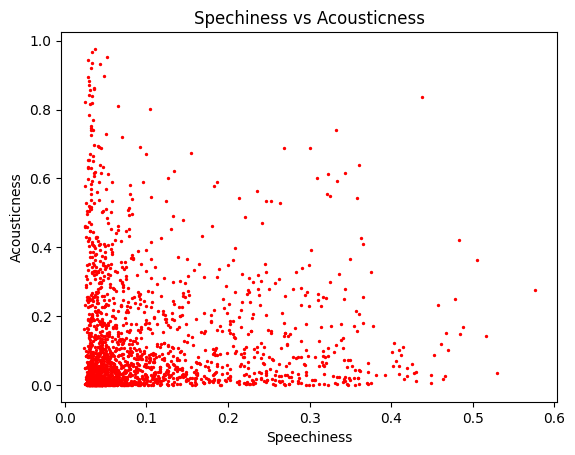

In [16]:
plt.figure()
plt.scatter(songs["speechiness"], songs["acousticness"], s = 2, c = "red")
plt.title("Spechiness vs Acousticness")
plt.xlabel("Speechiness")
plt.ylabel("Acousticness")
plt.show()

In [17]:
corr = scipy.stats.pearsonr(songs["speechiness"], songs["acousticness"])
print("Correlation Coefficent:", corr[0])

Correlation Coefficent: 0.0029262694398494993


In [18]:
res = scipy.stats.spearmanr(songs["speechiness"], songs["acousticness"])
print(res)

SignificanceResult(statistic=np.float64(0.05959899460595065), pvalue=np.float64(0.00862976066317566))


In [19]:
corr = scipy.stats.pearsonr(songs["danceability"], songs["energy"])
print("Correlation Coefficent:", corr[0])

Correlation Coefficent: -0.10320365945796128


In [20]:
res = scipy.stats.spearmanr(songs["danceability"], songs["energy"])
print(res)

SignificanceResult(statistic=np.float64(-0.15659477558357673), pvalue=np.float64(3.992192067469948e-12))


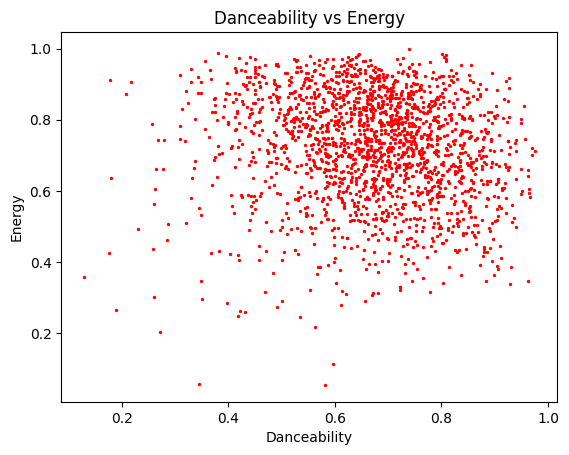

In [21]:
plt.figure()
plt.scatter(songs["danceability"], songs["energy"], s = 2, c = "red")
plt.title("Danceability vs Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show() 

## Categorical Data Analysis

In [22]:
artist_language = pd.crosstab(songs["explicit"], songs["artist"])
c, p, dof, expected = scipy.stats.chi2_contingency(artist_language)
print("The p-value is:", p)

The p-value is: 1.8025876710175944e-30


In [23]:
# This connection is statistically significant and can be used to generalize data in the sense that certain explicit content
# comes from specific artists

In [24]:
year_language = pd.crosstab(songs["explicit"], songs["year"])
c, p, dof, expected = scipy.stats.chi2_contingency(year_language)
print("The p-value is:", p)

The p-value is: 6.690692576783885e-06


In [25]:
# Also significant, as certain years contained more or less explicit content.

In [29]:
year_genre = pd.crosstab(songs["year"], songs["genre_1"])
c, p, dof, expected = scipy.stats.chi2_contingency(year_genre)
print("The p-value is:", p)

The p-value is: 2.9645685609553024e-17


In [30]:
artist_genre = pd.crosstab(songs["genre_1"], songs["artist"])
c, p, dof, expected = scipy.stats.chi2_contingency(artist_genre)
print("The p-value is:", p)

The p-value is: 0.0


In [31]:
genre_explicit = pd.crosstab(songs["genre_1"], songs["explicit"])
c, p, dof, expected = scipy.stats.chi2_contingency(genre_explicit)
print("The p-value is:", p)

The p-value is: 1.8297718881564108e-93


In [ ]:
# Come back and replace with genre_1 count, the main genre atrributed to each song to see how it changes values. 

## Spearating Genres

In [27]:
# In order to manageably examine the genre of each track, the entries of the genre category must be separated. This will result
# in multiple columns of data being created, but the one that will be focused on is Genre_1 as that is the genre that will most
# describe the fit of the track.

In [28]:
songs[["genre_1", "genre_2", "genre_3", "genre_4"]] = songs["genre"].str.split(',', expand = True)
print(songs)
# https://docs.python.org/3/library/stdtypes.html#str.split

              artist                                    song  explicit  year  \
0     Britney Spears                  Oops!...I Did It Again     False  2000   
1          blink-182                    All The Small Things     False  1999   
2         Faith Hill                                 Breathe     False  1999   
3           Bon Jovi                            It's My Life     False  2000   
4             *NSYNC                             Bye Bye Bye     False  2000   
...              ...                                     ...       ...   ...   
1995  Jonas Brothers                                  Sucker     False  2019   
1996    Taylor Swift                            Cruel Summer     False  2019   
1997    Blanco Brown                              The Git Up     False  2019   
1998       Sam Smith  Dancing With A Stranger (with Normani)     False  2019   
1999     Post Malone                                 Circles     False  2019   

      popularity  danceability  energy 

## Machine Learning with K-Nearest Neighbors

In [32]:
# Train-Test Split
X = songs[["speechiness", "valence", "explicit"]]
y = songs["genre_1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

The Accuracy of the Initial Model is: 0.5128644939965694


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Dance/Electronic'),
  Text(1, 0, 'Folk/Acoustic'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'World/Traditional'),
  Text(4, 0, 'country'),
  Text(5, 0, 'hip hop'),
  Text(6, 0, 'latin'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'rock'),
  Text(10, 0, 'set()')])

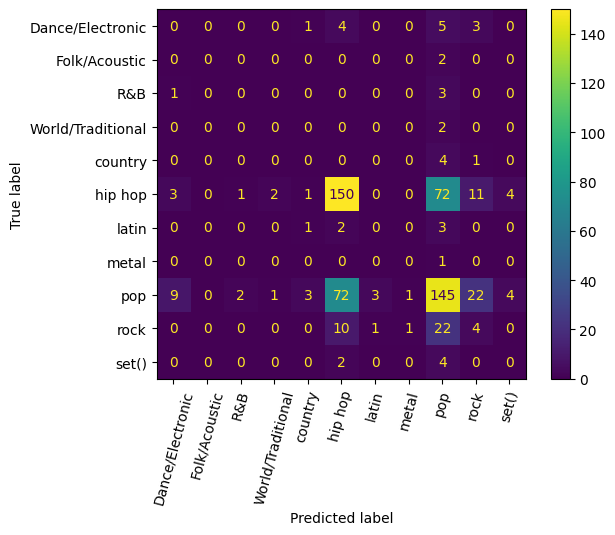

In [33]:
# Fit, prediction and confusion matrix
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("The Accuracy of the Initial Model is:", accuracy)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.xticks(rotation = 75) 

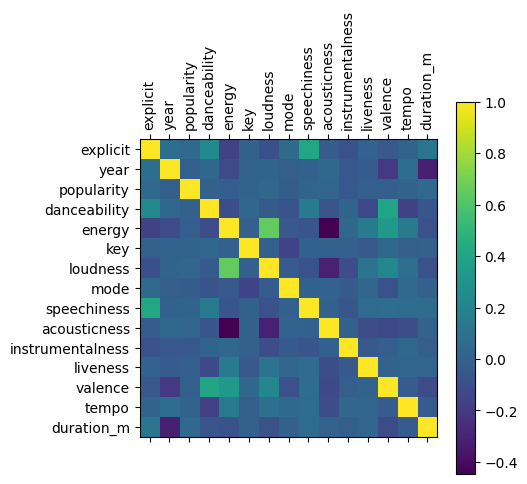

In [34]:
songs_corr = songs.corr(numeric_only = True)
plt.matshow(songs_corr)
num_labels = len(songs_corr.index)
plt.xticks(ticks = range(num_labels), labels = songs_corr.index, rotation=90)
plt.yticks(ticks=range(num_labels), labels = songs_corr.index)
plt.colorbar()
plt.show()

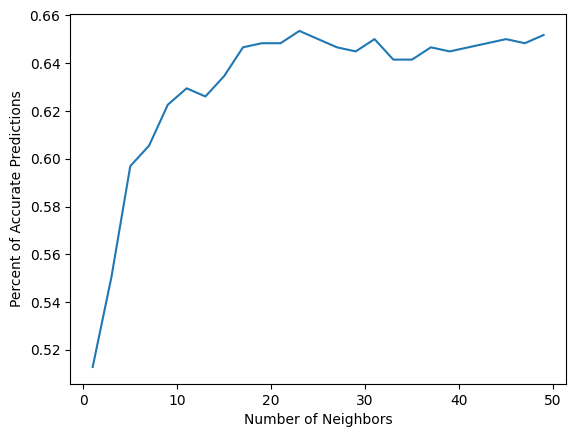

In [35]:
k_values = []
accuracy_scores = []

for k in range(1, 50, 2):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    k_values.append(k)
    accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores)
plt.xlabel("Number of Neighbors")
plt.ylabel("Percent of Accurate Predictions")
plt.show() # 12 Neighbors is ideal in origninal, 45 is in second

The Accuracy of the Revised Model is: 0.6449399656946827


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Dance/Electronic'),
  Text(1, 0, 'Folk/Acoustic'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'World/Traditional'),
  Text(4, 0, 'country'),
  Text(5, 0, 'hip hop'),
  Text(6, 0, 'latin'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'rock'),
  Text(10, 0, 'set()')])

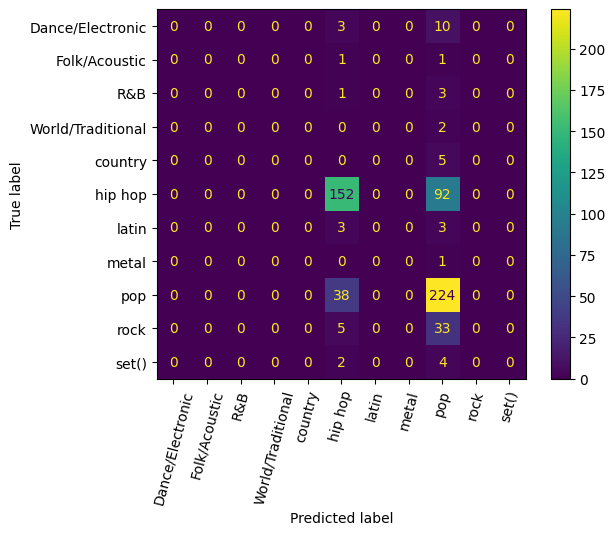

In [36]:
classifier = KNeighborsClassifier(n_neighbors = 36) # Added energy for tempo and speechiness for danceability, liveness, increased to 54%
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("The Accuracy of the Revised Model is:", accuracy)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.xticks(rotation = 75)

## 1. What Genres had the Most hits?

In [ ]:
genre = songs["genre_1"].value_counts()
genre

In [ ]:
genre.plot(kind = "bar", color = "rosybrown") 
plt.title("Spotify Hits by Genre 2000 - 2019")
plt.ylabel("Number of Hits")
plt.show()

## 2. What Artist had the Most Hits?

In [ ]:
song = songs["artist"].value_counts()
print(song)

In [ ]:
song.head(20).plot(kind = "bar", color = "brown")
plt.title("Hit Count by Artist (Top 20)")
plt.ylabel("Hit Count")
plt.xticks(rotation = 85)
plt.show()

## 3. Look at what happens with popularity scores

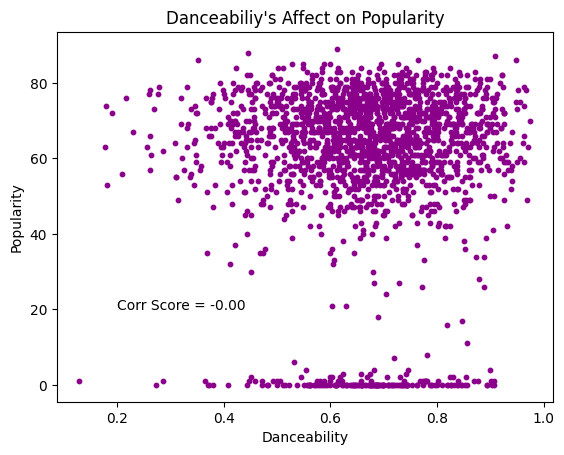

In [12]:
plt.scatter(songs["danceability"], songs["popularity"], color = "darkmagenta", s = 10)
plt.title("Danceabiliy's Affect on Popularity")
plt.annotate("Corr Score = -0.00", (0.2, 20.0))
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

In [38]:
corr = scipy.stats.pearsonr(songs["danceability"], songs["popularity"])
print("Correlation Coefficent:", corr[0])

Correlation Coefficent: -0.00014329311060148377


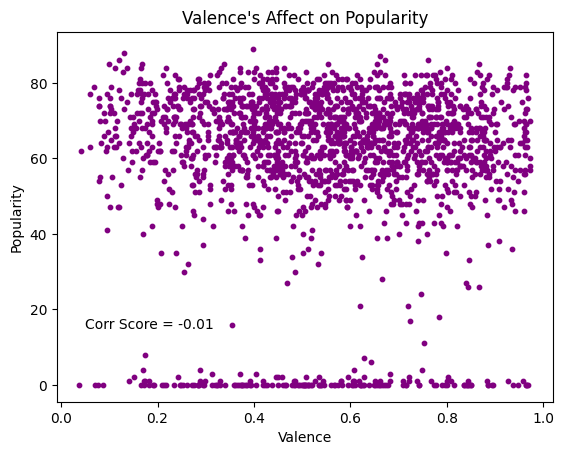

In [14]:
plt.scatter(songs["valence"], songs["popularity"], color = "purple", s = 10)
plt.title("Valence's Affect on Popularity")
plt.annotate("Corr Score = -0.01", (0.05, 15))
plt.xlabel("Valence")
plt.ylabel("Popularity")
plt.show()

In [44]:
corr = scipy.stats.pearsonr(songs["valence"], songs["popularity"])
print("Correlation Coefficent:", corr[0])

Correlation Coefficent: -0.01101239362499884


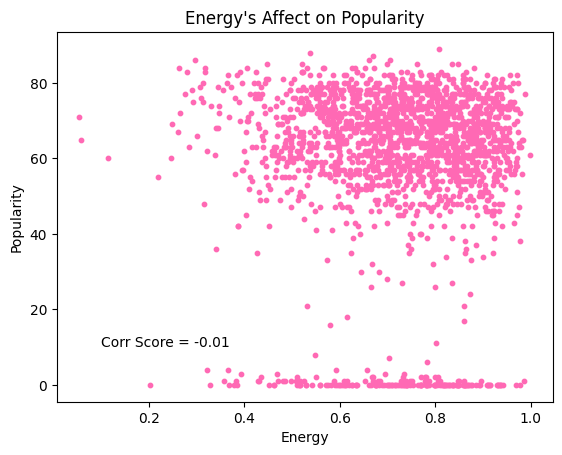

In [16]:
plt.scatter(songs["energy"], songs["popularity"], color = "hotpink", s = 10)
plt.title("Energy's Affect on Popularity")
plt.annotate("Corr Score = -0.01", (0.1, 10))
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()

In [47]:
corr = scipy.stats.pearsonr(songs["energy"], songs["popularity"])
print("Correlation Coefficent:", corr[0])

Correlation Coefficent: -0.013403867929277127


In [51]:
pop_sort = songs.sort_values(by = "popularity")
pop_sort

,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,genre,duration_m,genre_1,genre_2,genre_3,genre_4
62,Mariah Carey,Against All Odds (Take A Look at Me Now) (feat...,False,2011,0,0.471,0.514,1,-5.599,1,...,0.000000,0.1030,0.373,117.338,"pop, R&B",3.324667,pop,R&B,None,None
704,Mark Ronson,Valerie (feat. Amy Winehouse) - Version Revisited,False,2007,0,0.698,0.844,1,-4.789,1,...,0.000426,0.1240,0.896,105.828,pop,3.656883,pop,None,None,None
1083,Two Door Cinema Club,What You Know,False,2010,0,0.550,0.753,6,-4.003,0,...,0.000008,0.0921,0.841,139.048,"World/Traditional, rock, pop",3.161550,World/Traditional,rock,pop,None
1549,Silentó,Watch Me (Whip / Nae Nae),False,2015,0,0.819,0.768,8,-8.522,1,...,0.000000,0.3340,0.964,139.982,hip hop,3.085517,hip hop,None,None,None
1536,The Weeknd,In The Night,True,2015,0,0.480,0.682,7,-4.940,1,...,0.000000,0.0463,0.506,167.939,"pop, R&B",3.927550,pop,R&B,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,WILLOW,Wait a Minute!,False,2015,86,0.764,0.705,3,-5.279,0,...,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic",3.275333,pop,R&B,Dance/Electronic,None
1819,Billie Eilish,lovely (with Khalid),False,2018,86,0.351,0.296,4,-10.109,0,...,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic",3.336417,pop,Dance/Electronic,None,None
201,Eminem,Without Me,True,2002,87,0.908,0.669,7,-2.827,1,...,0.000000,0.2370,0.662,112.238,hip hop,4.838667,hip hop,None,None,None
1311,Tom Odell,Another Love,True,2013,88,0.445,0.537,4,-8.532,0,...,0.000017,0.0944,0.131,122.769,pop,4.072667,pop,None,None,None


## 4. Does Explicitness Matter in Popularity

In [ ]:
content = songs["explicit"].value_counts()
plt.pie(content, labels = content.index, autopct = "%1.1f%%")
plt.title("Explicit Content in Hits")
plt.show()
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html